In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [178]:
cameras = pd.read_csv(
    "/mnt/ssd_daten/Studium/MScGeodaesieGeoinformatik/4_Thesis/bilderserien/TPKarton/cameras.csv").set_index("camera")
points = pd.read_csv(
    "/mnt/ssd_daten/Studium/MScGeodaesieGeoinformatik/4_Thesis/bilderserien/TPKarton/points.csv").set_index("point_id")
vz_param = pd.read_csv(
    "/mnt/ssd_daten/Studium/MScGeodaesieGeoinformatik/4_Thesis/bilderserien/TPKarton/vz_param.csv").values[:, 1]
aruco = pd.read_csv(
    "/mnt/ssd_daten/Studium/MScGeodaesieGeoinformatik/4_Thesis/bilderserien/TPKarton/aruco.csv").set_index("id")
aruco = aruco[aruco["inlier"]]
bilder = pd.read_csv(
    "/mnt/ssd_daten/Studium/MScGeodaesieGeoinformatik/4_Thesis/bilderserien/TPKarton/bilder.csv").set_index("image")
coords = pd.read_csv(
    "/mnt/ssd_daten/Studium/MScGeodaesieGeoinformatik/4_Thesis/bilderserien/TPKarton/coords.csv").set_index("marker")
pp = pd.read_csv(
    "/mnt/ssd_daten/Studium/MScGeodaesieGeoinformatik/4_Thesis/bilderserien/TPKarton/passpunkte.csv")
pp.rename(columns={"pid": "point_id", "id": "image",
          "idx": "point_idx"}, inplace=True)
pp.rename(columns={"Unnamed: 0": "id"}, inplace=True)
pp.reset_index(drop=True, inplace=True)
pp.set_index("id", inplace=True)

In [179]:

pts_ = []
for i, row in bilder.iterrows():
    l = np.load(file=row["path"] + '.npz')["pt"]
    [pts_.append([i, n, p[0], p[1]]) for n, p in enumerate(l)]
pts = pd.DataFrame(pts_, columns=["image", "point_idx", "x", "y"])

In [180]:
joined_df = joined_df.merge(pts, on=["image", "point_idx"])
joined_df

,point_id,image,point_idx,path,camera,focus,x_x,y_x,x_y,y_y,x,y
0,92275,69,0,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,5.0,37.025242,1373.879028,37.025242,1373.879028,37.025242,1373.879028
1,71422,92,0,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,6.0,37.656891,1085.415527,37.656891,1085.415527,37.656891,1085.415527
2,71658,115,0,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,10.0,163.523376,1202.720093,163.523376,1202.720093,163.523376,1202.720093
3,71249,115,0,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,10.0,163.523376,1202.720093,163.523376,1202.720093,163.523376,1202.720093
4,71422,46,1,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,4.0,47.113457,1087.628296,47.113457,1087.628296,47.113457,1087.628296
...,...,...,...,...,...,...,...,...,...,...,...,...
123648,70116,68,7866,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,4.0,4597.042480,2018.774902,4597.042480,2018.774902,4597.042480,2018.774902
123649,70117,68,7871,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,4.0,4597.765137,1977.595459,4597.765137,1977.595459,4597.765137,1977.595459
123650,70119,68,7882,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,4.0,4599.907227,2000.318848,4599.907227,2000.318848,4599.907227,2000.318848
123651,70118,68,7887,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,4.0,4600.082520,2073.079346,4600.082520,2073.079346,4600.082520,2073.079346


In [181]:
pp.merge(bilder, on='image').sort_values(["camera", "point_idx"])

,point_id,image,point_idx,path,camera,focus
81985,92275,69,0,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,5.0
95139,71422,92,0,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,6.0
113730,71658,115,0,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,10.0
113783,71249,115,0,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,10.0
58049,71422,46,1,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,4.0
...,...,...,...,...,...,...
81965,70116,68,7866,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,4.0
81966,70117,68,7871,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,4.0
81968,70119,68,7882,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,4.0
81967,70118,68,7887,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,4.0


In [182]:
def calibrate(fokus, parameter=vz_param, f_offset=0, x_offset=0, y_offset=0) -> tuple:
    x = parameter
    if len(x) == 9:
        [x.append(0) for _ in range(5)]
    c = 3385 + x[0] + f_offset + x[3] * fokus
    cx = 2304 + x[1] + x_offset
    cy = 1296 + x[2] + y_offset
    cameraMatrix = np.array([[c, 0, cx], [0, c, cy], [0, 0, 1]])
    distCoeffs = np.array([x[9:14]]) + np.array([x[4:9]]) * fokus
    return cameraMatrix, distCoeffs

In [183]:
filtered = joined_df.merge(points, on='point_id',
                           how='inner', suffixes=('', '_coord')).sort_values(['camera', 'image', "focus"])

In [185]:
number_cam_param = 9
number_point_param = 3
number_vz_param = 14

arPos = {k: v for k, v in coords.iterrows()}

x = np.hstack([vz_param, points[["x", "y", "z"]].values.flatten(),
               cameras[["f_offset", "x_offset", "y_offset", "rx", "ry", "rz", "tx", "ty", "tz"]].values.flatten()])
point_ids = points.index.to_numpy()
camera_ids = cameras.index.to_numpy()

In [186]:
pts = pd.DataFrame(x[number_vz_param:number_vz_param+len(point_ids)*3].reshape(-1, 3),
                   columns=["x", "y", "z"])
pts["id"] = point_ids
pts.set_index("id", inplace=True)
cams = pd.DataFrame(x[number_vz_param+len(point_ids)*3:].reshape(-1, number_cam_param),
                    columns=["f_offset", "x_offset", "y_offset", "rx", "ry", "rz", "tx", "ty", "tz"])
cams["id"] = camera_ids
cams.set_index("id", inplace=True)

In [187]:
diff, dx, dy = [], [], []
filtered.sort_values(['camera', 'image', "focus"], inplace=True)
for (camera, image, focus), value in filtered.groupby(['camera', 'image', "focus"]):
    cameraMatrix, distCoeffs = calibrate(
        focus, vz_param, cams.loc[camera, "f_offset"], cams.loc[camera, "x_offset"], cams.loc[camera, "y_offset"])
    rvec = cams.loc[camera, ['rx', 'ry', 'rz']
                    ].to_numpy(dtype=np.float64)
    tvec = cams.loc[camera, ['tx', 'ty', 'tz']
                    ].to_numpy(dtype=np.float64)
    for key, row in value.iterrows():
        imgpoints, _ = cv2.projectPoints(
            np.array(pts.loc[row["point_id"]], np.float32), rvec, tvec, cameraMatrix, distCoeffs)
        d_ = imgpoints[0][0]-row[['x', 'y']].values
        diff.append(np.linalg.norm(d_))
        dx.append(d_[0])
        dy.append(d_[1])
filtered["diff"] = diff
filtered["dx"] = dx
filtered["dy"] = dy

In [188]:
aruco = aruco.merge(bilder, on='image', how='inner').sort_values(
    ["camera", "image"])

In [189]:
diff, dx, dy = [], [], []

aruco.sort_values(['image'], inplace=True)
for (camera, image, focus), value in aruco.groupby(["camera", "image", "focus"]):
    cam = cams.loc[camera]
    cameraMatrix, distCoeffs = calibrate(
        focus, vz_param, cam["f_offset"], cam["x_offset"], cam["y_offset"])
    rvec = cam[['rx', 'ry', 'rz']].to_numpy(dtype=np.float64)
    tvec = cam[['tx', 'ty', 'tz']].to_numpy(dtype=np.float64)
    for key, row in value.iterrows():
        imgpoints, _ = cv2.projectPoints(
            np.array(arPos[row["marker"]]), rvec, tvec, cameraMatrix, distCoeffs)
        d_ = imgpoints[0][0]-row[['x', 'y']].values
        diff.append(np.linalg.norm(d_))
        dx.append(d_[0])
        dy.append(d_[1])
aruco["diff"] = diff
aruco["dx"] = dx
aruco["dy"] = dy

In [190]:
aruco

,image,marker,x,y,inlier,path,camera,focus,diff,dx,dy
0,0,131,618.57355,1081.224700,True,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,5.211045,5.197312,0.378076
1,0,132,463.06595,1176.444500,True,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,5.820177,5.224780,2.564397
2,0,72,2799.63380,608.245100,True,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,6.890661,-4.260352,5.415773
3,0,73,2812.60080,470.871670,True,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,4.281808,0.056260,4.281438
4,0,30,2099.14140,454.248500,True,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,4.025260,-0.408139,4.004515
...,...,...,...,...,...,...,...,...,...,...,...
693,108,61,1726.00000,1220.000000,True,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,18,6.0,8.448332,-3.010300,7.893821
692,108,13,2611.83520,317.767500,True,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,18,6.0,8.156854,-7.779669,2.451738
694,111,162,2462.39160,42.374474,True,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,21,6.0,5.949326,4.968885,-3.271798
695,111,150,1848.45890,824.978800,True,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,21,6.0,6.706708,-5.694643,3.542734


In [191]:
filtered

,point_id,image,point_idx,path,camera,focus,x_x,y_x,x_y,y_y,x,y,x_coord,y_coord,z,diff,dx,dy
2,1146,0,22636,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,3697.971191,735.951477,3697.971191,735.951477,3697.971191,735.951477,0.108209,0.301040,0.078030,1.118187,-0.724121,0.852051
10,651,0,22701,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,3711.589844,847.245544,3711.589844,847.245544,3711.589844,847.245544,0.114581,0.301195,0.056276,13.473347,-13.314453,2.063110
22,1923,0,24778,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,3969.170654,466.290009,3969.170654,466.290009,3969.170654,466.290009,0.125673,0.352981,0.120750,1.743080,-1.672363,-0.491455
30,701,0,25615,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,4056.500244,692.108521,4056.500244,692.108521,4056.500244,692.108521,0.158372,0.328333,0.096000,4.621585,-4.475586,-1.152466
45,685,0,24410,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,1,1.0,3934.827881,249.821884,3934.827881,249.821884,3934.827881,249.821884,0.106824,0.353480,0.155822,8.376226,-7.263428,4.171783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,651,113,391,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,23,6.0,3556.697754,926.012573,3556.697754,926.012573,3556.697754,926.012573,0.114581,0.301195,0.056276,1339.873802,-1324.605469,-201.698181
16,651,136,220,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,23,10.0,3573.012207,919.227356,3573.012207,919.227356,3573.012207,919.227356,0.114581,0.301195,0.056276,1360.058850,-1343.261475,-213.093140
104,2068,45,2397,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,3.0,1212.973999,2490.187744,1212.973999,2490.187744,1212.973999,2490.187744,0.024285,-0.140423,-0.009277,2.749495,-1.731567,2.135742
105,2068,68,3073,/mnt/ssd_daten/Studium/MScGeodaesieGeoinformat...,24,4.0,1204.701904,2491.611084,1204.701904,2491.611084,1204.701904,2491.611084,0.024285,-0.140423,-0.009277,8.752816,-0.785156,8.717529


<AxesSubplot: xlabel='y', ylabel='dx'>

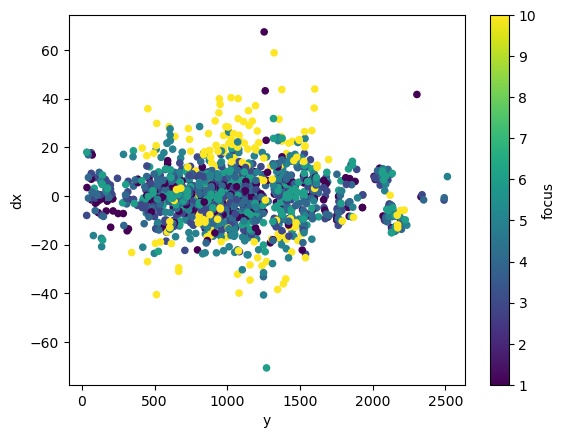

In [195]:
filtered[filtered["diff"] < 100].plot.scatter(
    x="y", y="dx", c="focus", colormap='viridis')

<AxesSubplot: xlabel='x', ylabel='y'>

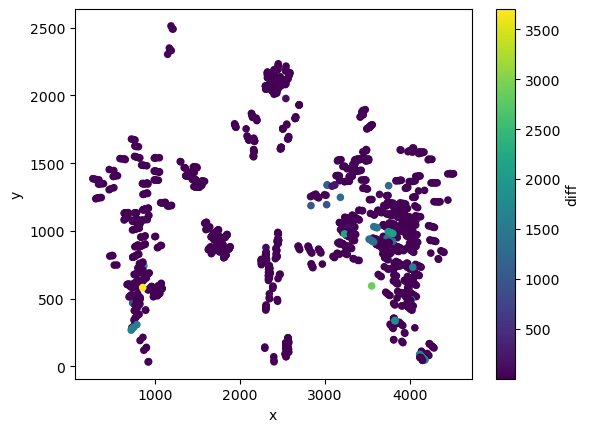

In [194]:
filtered.plot.scatter(
    x="x", y="y", c="diff", colormap='viridis')

<AxesSubplot: xlabel='x', ylabel='dx'>

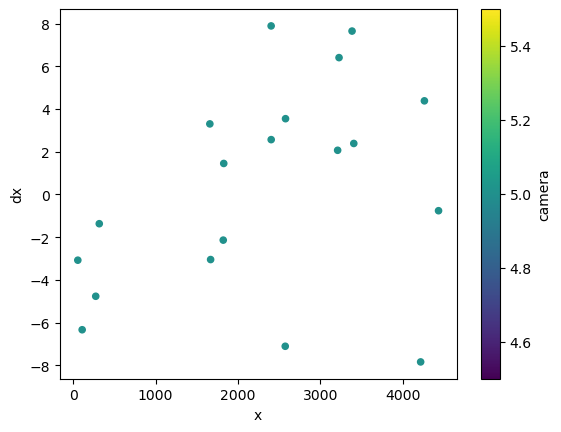

In [154]:
aruco[aruco["image"] == 4].plot.scatter(
    x="x", y="dx", c="camera", colormap='viridis')

<AxesSubplot: ylabel='Frequency'>

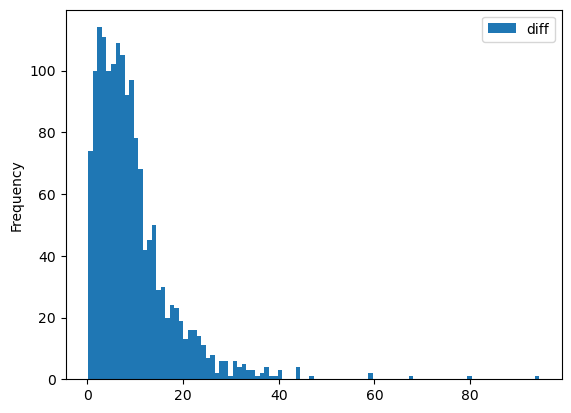

In [102]:
filtered[filtered["diff"] < 100].plot.hist(y="diff", bins=100)